# 피마 인디언 당뇨병 예측

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [21]:
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

In [22]:
df = pd.read_csv('C:/Workspace/DeepLearning/dataset/pima-indians-diabetes.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 데이터 전처리와 훈련/테스트 셀 나누기

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.iloc[:,:-1].values)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, df.iloc[:,-1].values,
    stratify=df.iloc[:,-1].values, random_state=2021
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((576, 8), (192, 8), (576,), (192,))

## 모델 정의/설정/학습/평가
- 12/8/1 layer, 200 epochs

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [26]:
# 모델 정의
model = Sequential([
    Dense(12, input_shape=(8,), activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')               
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [27]:
# 모델 정의
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
    )

In [30]:
# 모델 학습
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=50,
    verbose=0       # 0으로 주면 아무것도 출력되지않는다/ 1,2로주면 보임
    )

In [33]:
acc = model.evaluate(X_test, y_test)
print(f'정확도: {acc[1]:.4f}')


6/6 [==============================] - 0s 1ms/step - loss: 0.7395 - accuracy: 0.7656
정확도: 0.7656


- 30/1, 100 epochs

In [34]:
model2 = Sequential([
    Dense(30, input_shape=(8,), activation='relu'),
    Dense(1, activation='sigmoid')               
])
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 30)                270       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [36]:
model2.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
    )

In [37]:
history2 = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=50,
    verbose=1       # 0으로 주면 아무것도 출력되지않는다/ 1,2로주면 보임
    )

Epoch 1/100
10/10 [==============================] - 0s 5ms/step - loss: 0.2049 - accuracy: 0.9261 - val_loss: 1.1477 - val_accuracy: 0.6552
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2058 - accuracy: 0.9283 - val_loss: 1.1455 - val_accuracy: 0.6638
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2037 - accuracy: 0.9283 - val_loss: 1.1399 - val_accuracy: 0.6724
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2033 - accuracy: 0.9283 - val_loss: 1.1459 - val_accuracy: 0.6724
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2031 - accuracy: 0.9261 - val_loss: 1.1393 - val_accuracy: 0.6724
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2028 - accuracy: 0.9283 - val_loss: 1.1349 - val_accuracy: 0.6724
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2027 - accuracy: 0.9304 - val_loss: 1.1235 - val_accuracy: 0.6810
Epoch 8/100
1

In [43]:
model2.evaluate(X_test, y_test)

6/6 [==============================] - 0s 998us/step - loss: 0.6786 - accuracy: 0.5833


[0.6785791516304016, 0.5833333134651184]

In [ ]:
- 24/12/8/1 layers, 200 epochs

In [57]:
model3 = Sequential([
    Dense(24, input_shape=(8,), activation='relu'),
    Dense(12, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')                 
])
model3.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 24)                216       
_________________________________________________________________
dense_19 (Dense)             (None, 12)                300       
_________________________________________________________________
dense_20 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 9         
Total params: 629
Trainable params: 629
Non-trainable params: 0
_________________________________________________________________


In [58]:
model3.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
    )

In [59]:
history3 = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=50,
    verbose=2       
    )

0.6552
Epoch 2/200
10/10 - 0s - loss: 0.5627 - accuracy: 0.7283 - val_loss: 0.6275 - val_accuracy: 0.6638
Epoch 3/200
10/10 - 0s - loss: 0.5516 - accuracy: 0.7435 - val_loss: 0.6109 - val_accuracy: 0.6638
Epoch 4/200
10/10 - 0s - loss: 0.5364 - accuracy: 0.7522 - val_loss: 0.5993 - val_accuracy: 0.6724
Epoch 5/200
10/10 - 0s - loss: 0.5272 - accuracy: 0.7522 - val_loss: 0.5919 - val_accuracy: 0.6638
Epoch 6/200
10/10 - 0s - loss: 0.5186 - accuracy: 0.7717 - val_loss: 0.5880 - val_accuracy: 0.6724
Epoch 7/200
10/10 - 0s - loss: 0.5129 - accuracy: 0.7652 - val_loss: 0.5803 - val_accuracy: 0.6724
Epoch 8/200
10/10 - 0s - loss: 0.5085 - accuracy: 0.7565 - val_loss: 0.5806 - val_accuracy: 0.6466
Epoch 9/200
10/10 - 0s - loss: 0.5011 - accuracy: 0.7652 - val_loss: 0.5768 - val_accuracy: 0.6552
Epoch 10/200
10/10 - 0s - loss: 0.4977 - accuracy: 0.7717 - val_loss: 0.5774 - val_accuracy: 0.6552
Epoch 11/200
10/10 - 0s - loss: 0.4938 - accuracy: 0.7739 - val_loss: 0.5855 - val_accuracy: 0.6379
E

In [60]:
model3.evaluate(X_test, y_test)

6/6 [==============================] - 0s 831us/step - loss: 0.6946 - accuracy: 0.5052


[0.6946272850036621, 0.5052083134651184]

## MinMaxScaling

In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df.iloc[:,:-1].values)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, df.iloc[:,-1].values,
    stratify=df.iloc[:,-1].values,random_state=seed
)

In [49]:
model4 = Sequential([
    Dense(12, input_shape=(8,), activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')                 
])
model4.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 12)                108       
_________________________________________________________________
dense_16 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [50]:
model4.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [51]:
history4 = model4.fit(
    X_train, y_train, validation_split=0.2,
    epochs=200, batch_size=50, verbose=2
)

0.6466
Epoch 2/200
10/10 - 0s - loss: 0.6735 - accuracy: 0.6630 - val_loss: 0.6785 - val_accuracy: 0.5948
Epoch 3/200
10/10 - 0s - loss: 0.6676 - accuracy: 0.6652 - val_loss: 0.6775 - val_accuracy: 0.5862
Epoch 4/200
10/10 - 0s - loss: 0.6631 - accuracy: 0.6652 - val_loss: 0.6768 - val_accuracy: 0.5862
Epoch 5/200
10/10 - 0s - loss: 0.6582 - accuracy: 0.6652 - val_loss: 0.6762 - val_accuracy: 0.5862
Epoch 6/200
10/10 - 0s - loss: 0.6549 - accuracy: 0.6652 - val_loss: 0.6756 - val_accuracy: 0.5862
Epoch 7/200
10/10 - 0s - loss: 0.6515 - accuracy: 0.6652 - val_loss: 0.6744 - val_accuracy: 0.5862
Epoch 8/200
10/10 - 0s - loss: 0.6491 - accuracy: 0.6652 - val_loss: 0.6743 - val_accuracy: 0.5862
Epoch 9/200
10/10 - 0s - loss: 0.6457 - accuracy: 0.6652 - val_loss: 0.6724 - val_accuracy: 0.5862
Epoch 10/200
10/10 - 0s - loss: 0.6428 - accuracy: 0.6652 - val_loss: 0.6698 - val_accuracy: 0.5862
Epoch 11/200
10/10 - 0s - loss: 0.6400 - accuracy: 0.6652 - val_loss: 0.6696 - val_accuracy: 0.5862
E

In [52]:
model4.evaluate(X_test, y_test)

6/6 [==============================] - 0s 950us/step - loss: 0.4530 - accuracy: 0.7865


[0.4530090093612671, 0.7864583134651184]

## 시각화

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
y_acc = history4.history['accuracy']
y_vloss = history4.history['val_loss']
x_len = np.arange(len(y_acc))

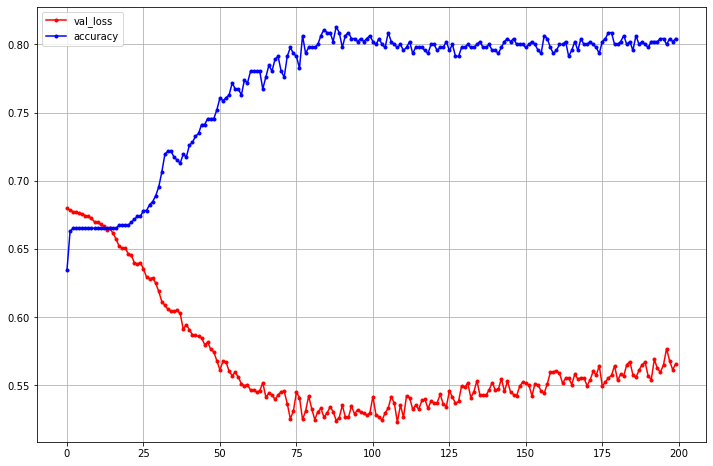

In [56]:
plt.figure(figsize=(12,8))
plt.plot(x_len, y_vloss, 'ro-', markersize=3, label='val_loss')
plt.plot(x_len, y_acc, 'bo-', markersize=3, label='accuracy')
plt.legend()
plt.grid()
plt.show()